## Developement of FCN Losses

In [30]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, platform,pickle
import tensorflow as tf
import keras.backend as KB
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
syst = platform.system()
if syst == 'Windows':
    dataset_path = "E:/git_projs/MRCNN3/train_newshapes/"
elif syst == 'Linux':
    dataset_path = "/home/kbardool/mrcnn3/train_newshapes/"
else :
    raise Error('unrecognized system ')    
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
import mrcnn.prep_notebook as prep
from mrcnn.prep_notebook import build_fcn_training_pipeline, run_fcn_training_pipeline
from mrcnn.prep_notebook import build_fcn_training_pipeline_newshapes
from mrcnn.visualize     import display_training_batch
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.utils         import logt
# from mrcnn.prep_notebook import get_inference_batch, get_image_batch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks


In [168]:

##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
input_parms = " --epochs 2 " 
input_parms +=" --steps_in_epoch    100 "    
input_parms +=" --val_steps           5 " 
input_parms +=" --last_epoch          0 "
input_parms +=" --batch_size          2 "
input_parms +=" --lr             0.0001 "
input_parms +=" --mrcnn_logs_dir   train_mrcnn_newshapes "
input_parms +=" --fcn_logs_dir     train_fcn8_newshapes "
input_parms +=" --mrcnn_model      last "
input_parms +=" --fcn_model        init "
input_parms +=" --fcn_bce_loss_method 2 " 
input_parms +=" --fcn_bce_loss_class  3 " 
input_parms +=" --opt              adam "
input_parms +=" --fcn_arch         fcn8L2 " 
input_parms +=" --fcn_layers       all " 
input_parms +=" --sysout           screen "
input_parms +=" --scale_factor        1 " 
input_parms +=" --new_log_folder   "        

parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     2
   coco_classes                   None
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             3
   fcn_bce_loss_method            2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8_newshapes
   fcn_losses                     fcn_BCE_loss
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt                            ADAM
   scale_factor                   1
   steps_in_epoch                 100
   sysout                         SCREEN
   val_steps                      5




In [172]:
mrcnn_model, fcn_model = build_fcn_training_pipeline_newshapes(args = args, verbose = 1)

MODE IS: training

   Arguments passed :
   --------------------
   batch_size                     2
   coco_classes                   None
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             3
   fcn_bce_loss_method            2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8_newshapes
   fcn_losses                     fcn_BCE_loss
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt                            ADAM
   scale_factor                   1
   steps_in_epoch                 100
   sysout                         SCREEN
   val_steps                  

 layer:  1    output name: cntxt_layer/pred_heatmap_scores:0          Type: float32           Shape: (2, 7, 32, 23)
 layer:  2    output name: cntxt_layer_gt/gt_heatmap:0                Type: float32           Shape: (2, 128, 128, 7)
 layer:  3    output name: cntxt_layer_gt/gt_heatmap_scores:0         Type: float32           Shape: (2, 7, 32, 23)
 layer:  4    output name: mrcnn_class_lambda/mrcnn_class:0           Type: float32           Shape: (?, 32, 7)
 layer:  5    output name: mrcnn_bbox_lambda/mrcnn_bbox:0             Type: float32           Shape: (?, 32, 7, 4)
 layer:  6    output name: proposal_targets/output_rois:0             Type: float32           Shape: (2, ?, ?)
 layer:  7    output name: proposal_targets/target_class_ids:0        Type: int32             Shape: (2, ?)
 layer:  8    output name: proposal_targets/target_bbox_deltas:0      Type: float32           Shape: (2, ?, ?)
 layer:  9    output name: proposal_targets/roi_gt_boxes:0            Type: float32          


   --- FCN16 ----------------------------
   FCN scorePool4 (Conv2D(Pool4)) shape is                   :  (None, 8, 8, 7)    keras_tensor  True
   FCN 2x Upsampling (Deconvolution2D(fcn32_classify)) shape :  (None, 10, 10, 7)    keras_tensor  True
   FCN 2x Upsampling/Cropped (Cropped2D(score2)) shape       :  (None, 8, 8, 7)    keras_tensor  True
   FCN Add Score2,scorePool4 Add(score2_c, scorePool4) shape :  (None, 8, 8, 7)    keras_tensor  True
   FCN upscore_pool4 (Deconv(fuse_Pool4)) shape              :  (None, 16, 16, 7)    keras_tensor  True

   --- FCN8 ----------------------------
   FCN scorePool4 (Conv2D(Pool4)) shape                      :  (None, 16, 16, 7)    keras_tensor  True
   FCN 2x Upsampling/Cropped (Cropped2D(score2)) shape       :  (None, 16, 16, 7)    keras_tensor  True
   FCN Add Score2,scorePool4 shape is                        :  (None, 16, 16, 7)    keras_tensor  True
    FCN fcn8_classify/heatmap  (Deconv(fuse_Pool4)):  shape: (?, 128, 128, 7)      KB.sha

In [6]:
# mrcnn_model.keras_model.summary()
# fcn_model.keras_model.summary()
# mrcnn_model.display_layer_info()
# fcn_model.display_layer_info()

# mrcnn_model.config.display()
# fcn_model.config.display()

## Load Training Files and Display Images

In [11]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
# dataset_train, train_generator = prep_newshape_dataset( mrcnn_model.config, 10000, generator=True)
# dataset_val  , val_generator   = prep_newshape_dataset( mrcnn_model.config,  2500, generator=True)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_training_dataset_10000_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_train, outfile)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_validation_dataset_2500_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_val, outfile)

## -- OR --

with open(os.path.join(dataset_path, 'newshapes_training_dataset_10000_A.pkl'), 'rb') as outfile:
    dataset_train = pickle.load(outfile)
with open(os.path.join(dataset_path, 'newshapes_validation_dataset_2500_A.pkl'), 'rb') as outfile:
    dataset_val = pickle.load(outfile)
## If we desire a generator, here it is:    
## train_generator = data_generator(dataset_train, mrcnn_model.config, batch_size=mrcnn_model.config.BATCH_SIZE,
#                                    shuffle = True, augment = False) 
## val_generator = data_generator(dataset_val, mrcnn_model.config, batch_size=mrcnn_model.config.BATCH_SIZE,
#                                    shuffle = True, augment = False) 
class_names = dataset_train.class_names
# dataset_train.display_active_classes()
# dataset_val.display_active_classes()
print(mrcnn_model.config.BATCH_SIZE, fcn_model.config.BATCH_SIZE)
print(len(dataset_train.image_ids), len(dataset_val.image_ids))

1 1
10000 2500


###  Display some images from training and val datasets

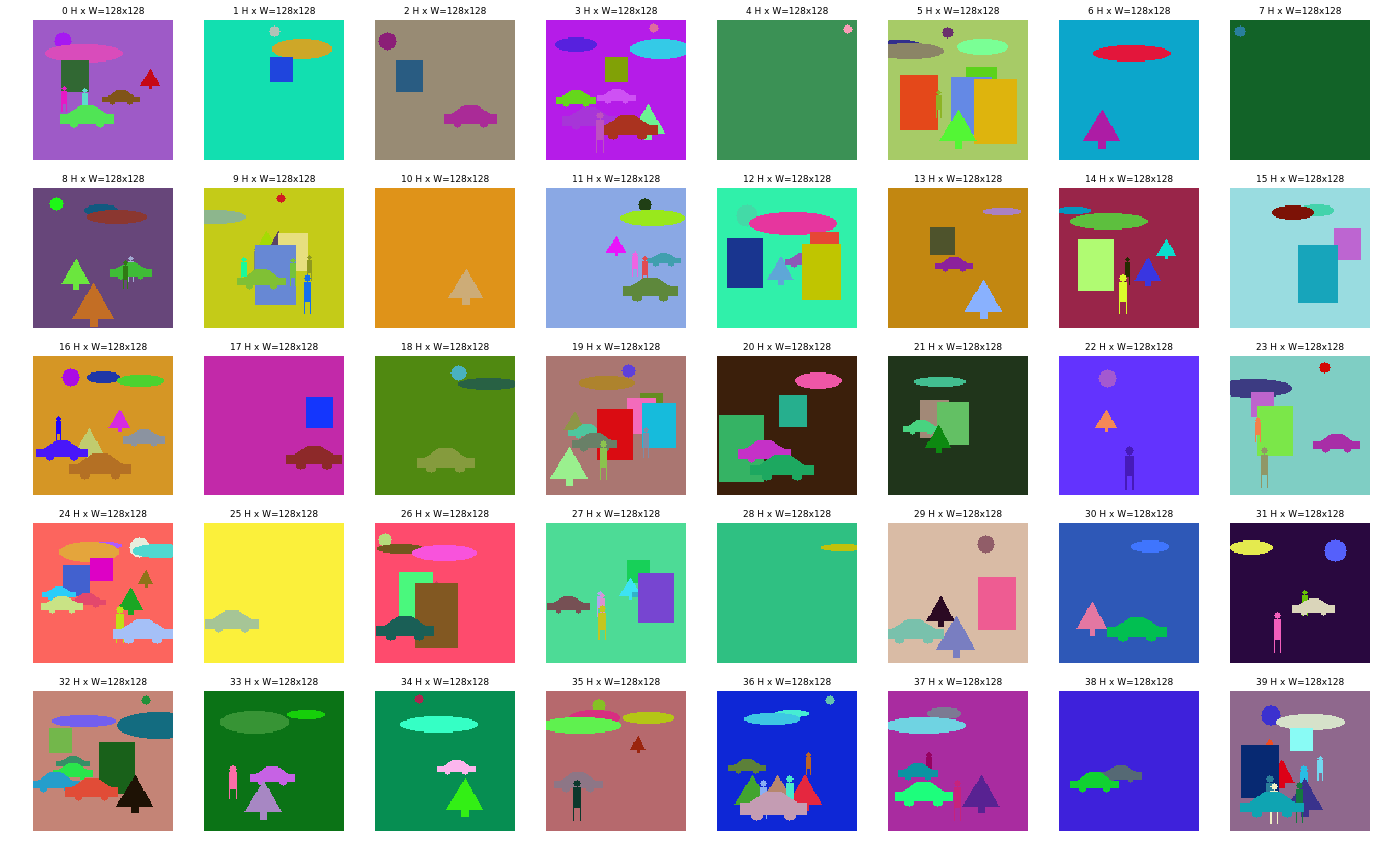

In [14]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_train, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

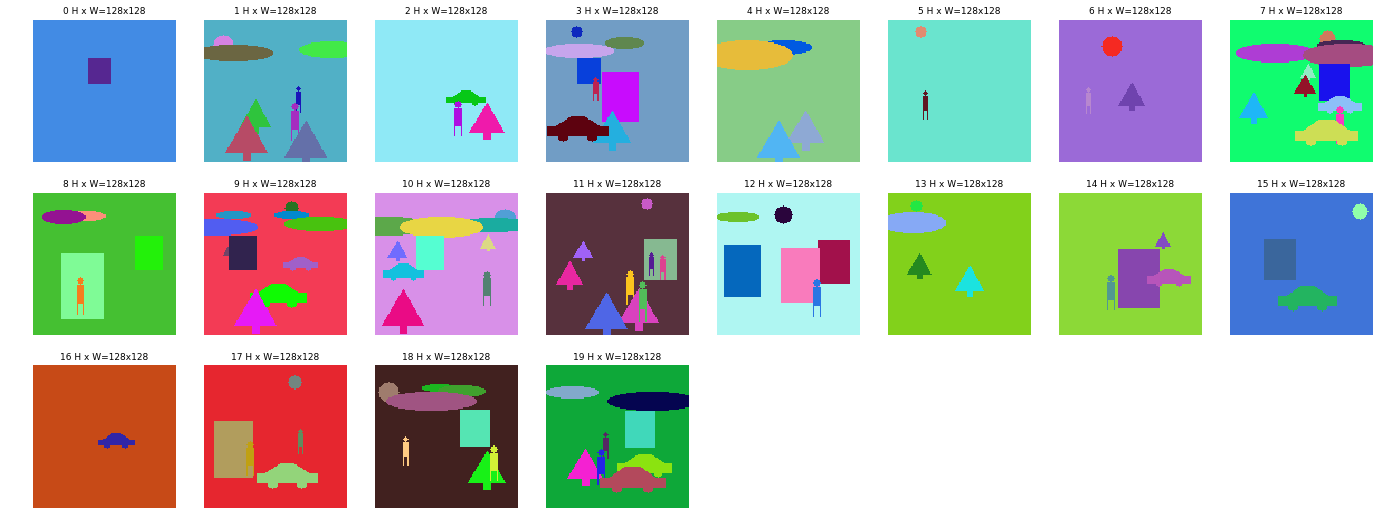

In [15]:
image_list = list(range(0,20))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_val, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

### Load a specific image using image_id  with Ground Truth bounding boxes and masks

In [ ]:
# train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, [417])
# visualize.display_training_batch(dataset_train, train_batch_x)

image id :  0
 Image_id    :  0  Reference:  [('sun', (166, 25, 241), (27, 19, 8, 8)), ('cloud', (217, 76, 187), (46, 30, 35, 8)), ('building', (49, 104, 51), (38, 51, 12, 14)), ('tree', (198, 9, 23), (107, 52, 10, 10)), ('car', (128, 84, 25), (80, 72, 17, 8)), ('person', (230, 25, 197), (28, 74, 2, 12)), ('person', (92, 222, 203), (47, 77, 2, 13)), ('car', (80, 228, 85), (49, 90, 24, 12))] Coco Id: 0
 Image meta  :  [0 128 128 3 0 0 128 128]
 Class ids   :  (8,)    [3 6 4 5 2 1 1 2]
 Class Names :  ['sun', 'cloud', 'building', 'tree', 'car', 'person', 'person', 'car']


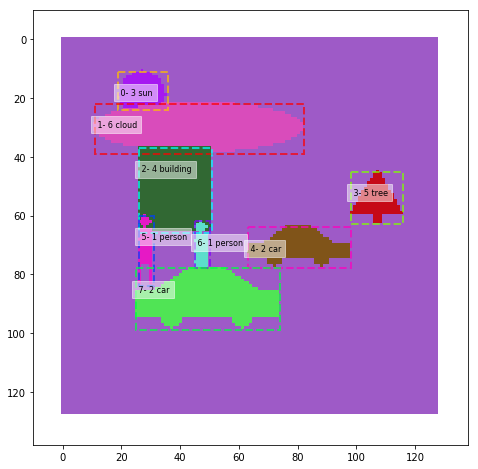

image id :  1
 Image_id    :  1  Reference:  [('sun', (179, 194, 183), (64, 10, 5, 5)), ('cloud', (206, 167, 40), (89, 26, 27, 9)), ('building', (31, 69, 221), (70, 45, 10, 11))] Coco Id: 1
 Image meta  :  [1 128 128 3 0 0 128 128]
 Class ids   :  (3,)    [3 6 4]
 Class Names :  ['sun', 'cloud', 'building']


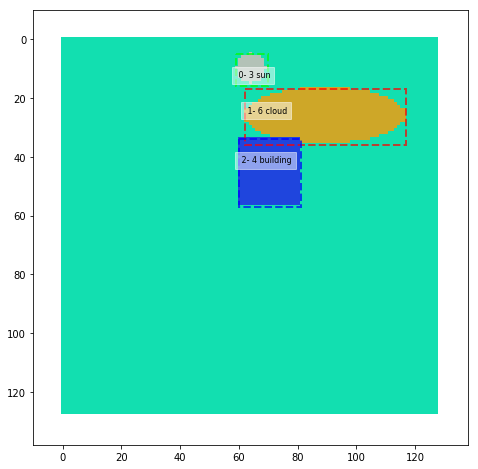

In [130]:
IMAGE_IDS = [0,1]
# train_batch_x, train_batch_y = next(train_generator)
train_batch_x, train_batch_y = prep.data_gen_simulate(dataset_train, mrcnn_model.config, IMAGE_IDS)
visualize.display_training_batch(dataset_train, train_batch_x)

###  Get training batch  from generator and display images

In [6]:
train_batch_x, train_batch_y = next(train_generator)

visualize.display_training_batch(dataset_train, train_batch_x) 

In [8]:
# train_batch_x[5]

# train_batch_x = get_training_batch(dataset_train, mrcnn_model.config, [2,3], display = True, masks = False)
dataset_train.image_info[2]    

##  Pass data thru MRCNN model

#### Load a specific image using image_id  with Ground Truth bounding boxes and masks

image id :  0
 Image_id    :  0  Reference:  [('sun', (166, 25, 241), (27, 19, 8, 8)), ('cloud', (217, 76, 187), (46, 30, 35, 8)), ('building', (49, 104, 51), (38, 51, 12, 14)), ('tree', (198, 9, 23), (107, 52, 10, 10)), ('car', (128, 84, 25), (80, 72, 17, 8)), ('person', (230, 25, 197), (28, 74, 2, 12)), ('person', (92, 222, 203), (47, 77, 2, 13)), ('car', (80, 228, 85), (49, 90, 24, 12))] Coco Id: 0
 Image meta  :  [  0 128 128   3   0   0 128 128]
 Class ids   :  (8,)    [3 6 4 5 2 1 1 2]
 Class Names :  ['sun', 'cloud', 'building', 'tree', 'car', 'person', 'person', 'car']


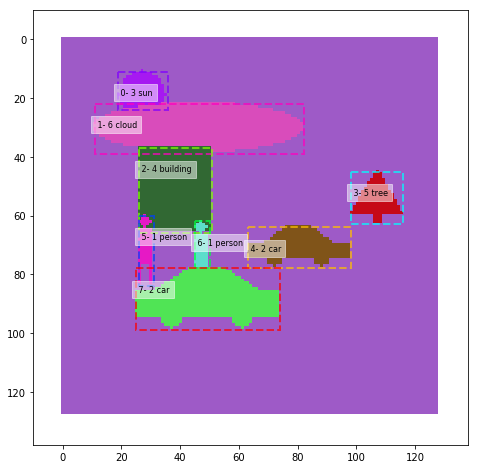

image id :  1
 Image_id    :  1  Reference:  [('sun', (179, 194, 183), (64, 10, 5, 5)), ('cloud', (206, 167, 40), (89, 26, 27, 9)), ('building', (31, 69, 221), (70, 45, 10, 11))] Coco Id: 1
 Image meta  :  [  1 128 128   3   0   0 128 128]
 Class ids   :  (3,)    [3 6 4]
 Class Names :  ['sun', 'cloud', 'building']


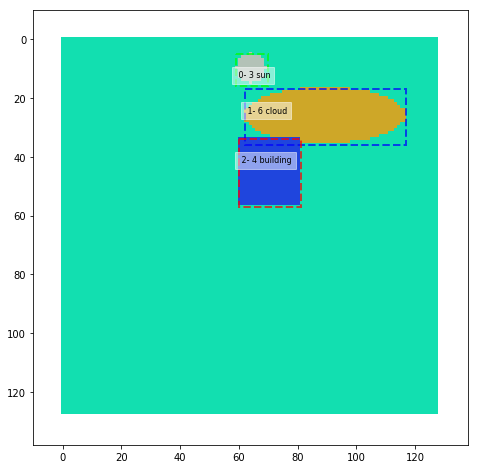

In [173]:
IMAGE_IDS = [0,1]
# train_batch_x, train_batch_y = next(train_generator)
train_batch_x, train_batch_y = prep.data_gen_simulate(dataset_train, mrcnn_model.config, IMAGE_IDS)
visualize.display_training_batch(dataset_train, train_batch_x)

#### Pass data through pipeine

In [174]:
from mrcnn.prep_notebook import run_full_training_pipeline
# results = run_fcn_training_pipeline(mrcnn_model, fcn_model, dataset_train, mrcnn_input = train_batch_x, image_ids = None, verbose = 1)
results = run_full_training_pipeline(mrcnn_model, fcn_model, dataset_train, mrcnn_input = train_batch_x, image_ids = None, verbose = 1)

** Pass through MRCNN model:
/* Inputs */
Input  0:  (input_image:0                           ) 	  Input shape: (2, 128, 128, 3)
Input  1:  (input_image_meta:0                      ) 	  Input shape: (2, 15)
Input  2:  (input_rpn_match:0                       ) 	  Input shape: (2, 4092, 1)
Input  3:  (input_rpn_bbox:0                        ) 	  Input shape: (2, 256, 4)
Input  4:  (input_gt_class_ids:0                    ) 	  Input shape: (2, 100)
Input  5:  (input_gt_boxes:0                        ) 	  Input shape: (2, 100, 4)

Requested layers:
-----------------
Layer   0:  (cntxt_layer/pred_heatmap:0              ) 	  Output shape: (2, 128, 128, 7)
Layer   1:  (cntxt_layer/pred_heatmap_scores:0       ) 	  Output shape: (2, 7, 32, 23)
Layer   2:  (cntxt_layer_gt/gt_heatmap:0             ) 	  Output shape: (2, 128, 128, 7)
Layer   3:  (cntxt_layer_gt/gt_heatmap_scores:0      ) 	  Output shape: (2, 7, 32, 23)
Layer   4:  (mrcnn_class_lambda/mrcnn_class:0        ) 	  Output shape: (?, 32

#### What is returned in `results`

In [21]:
print(len(results))
print(results.keys())
for i, r in enumerate(results):
    print('\n output ', i, '  ',r, type(results[r]))
    for j, itm in enumerate(results[r]):
        print('    ',j, '   ', itm.shape)
#     for item in results[0][grp]:
#         print(key.ljust(20), r[key].shape)

5
dict_keys(['mrcnn_input', 'mrcnn_output', 'image_batch', 'fcn_input', 'fcn_output'])

 output  0    mrcnn_input <class 'list'>
     0     (1, 128, 128, 3)
     1     (1, 15)
     2     (1, 4092, 1)
     3     (1, 256, 4)
     4     (1, 100)
     5     (1, 100, 4)

 output  1    mrcnn_output <class 'list'>
     0     (1, 128, 128, 7)
     1     (1, 7, 32, 23)
     2     (1, 128, 128, 7)
     3     (1, 7, 32, 23)
     4     (1, 32, 7)
     5     (1, 32, 7, 4)
     6     (1, 32, 4)
     7     (1, 32)
     8     (1, 32, 4)
     9     (1, 32, 7)
     10     (1, 7)
     11     (1, 2000, 4)

 output  2    image_batch <class 'numpy.ndarray'>
     0     (128, 128, 3)

 output  3    fcn_input <class 'list'>
     0     (1, 15)
     1     (1, 128, 128, 7)
     2     (1, 7, 32, 23)
     3     (1, 128, 128, 7)
     4     (1, 7, 32, 23)

 output  4    fcn_output <class 'list'>
     0     (1, 128, 128, 7)
     1     (1, 128, 128, 7)
     2     (1, 1)
     3     (1, 1)
     4     (1, 7, 32, 23)


####  load returned data to variables

In [175]:
model_input_image_meta     = results['mrcnn_input'][1]
model_gt_class_ids         = results['mrcnn_input'][4] 
model_pr_hm                = results['mrcnn_output'][0] 
model_pr_hm_scores         = results['mrcnn_output'][1] 
model_gt_hm                = results['mrcnn_output'][2]          # layer:  2   shape: (1, 256, 256, 81)
model_gt_hm_scores         = results['mrcnn_output'][3]          # layer:  3   shape: (1, 81, 100, 23)

model_fcn_hm               = results['fcn_output'][0]          # layer:  0   shape: (1, 256, 256, 81)
model_fcn_sm               = results['fcn_output'][1]          # layer:  0   shape: (1, 256, 256, 81)
model_MSE_loss             = results['fcn_output'][2]          # layer:  1   shape: ()
model_BCE_loss             = results['fcn_output'][3]
model_fcn_hm_scores        = results['fcn_output'][4]
# model_active_class_ids                = fcn_model_output[2]
# hm_sum = np.sum(model_fcn_heatmap, axis=(1,2))
print('model_gt_hm       : ', model_gt_hm.shape)
print('model_gt_hm_scores: ', model_gt_hm_scores.shape)
print('model_fcn_hm      : ', model_fcn_hm.shape)
print('model_fcn_sm      : ', model_fcn_sm.shape)
print('MSE heatmap loss  : ', model_MSE_loss.shape, model_MSE_loss[0,0])
print('BCE_loss          : ', model_BCE_loss.shape, model_BCE_loss[0,0])

model_gt_hm       :  (2, 128, 128, 7)
model_gt_hm_scores:  (2, 7, 32, 23)
model_fcn_hm      :  (2, 128, 128, 7)
model_fcn_sm      :  (2, 128, 128, 7)
MSE heatmap loss  :  (1, 1) 0.0024161772
BCE_loss          :  (1, 1) 0.024560377


In [133]:
# model_active_class_ids                = fcn_model_output[2]
# hm_sum = np.sum(model_fcn_heatmap, axis=(1,2))
print('model_gt_hm       : ', model_gt_hm.shape)
print('model_gt_hm_scores: ', model_gt_hm_scores.shape)
print('model_fcn_hm      : ', model_fcn_hm.shape)
print('model_fcn_sm      : ', model_fcn_sm.shape)
print('MSE heatmap loss  : ', model_MSE_loss.shape, model_MSE_loss[0,0])
print('BCE_loss          : ', model_BCE_loss.shape, model_BCE_loss[0,0])

model_gt_hm       :  (2, 128, 128, 7)
model_gt_hm_scores:  (2, 7, 32, 23)
model_fcn_hm      :  (2, 128, 128, 7)
model_fcn_sm      :  (2, 128, 128, 7)
MSE heatmap loss  :  (1, 1) 0.0017496777
BCE_loss          :  (1, 1) 0.042059556


#### Display values from FCN_heatmap

In [102]:
img_id = 0 
class_ids = np.unique(model_gt_hm_scores[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
for i in range(class_ids[-1]+1):
    
    print('GT Heatmap  class: {:3d}   min: {:12.8f}    max: {:12.8f}    sum: {:12.8f} '.format(i, np.min(model_gt_hm[0,:,:,i]), 
                                                                    np.max(model_gt_hm[0,:,:,i]), 
                                                                    np.sum(model_gt_hm[0,:,:,i])))
    print('PR Heatmap  class: {:3d}   min: {:12.8f}    max: {:12.8f}    sum: {:12.8f} '.format(i, np.min(model_pr_hm[0,:,:,i]), 
                                                                np.max(model_pr_hm[0,:,:,i]), 
                                                                np.sum(model_pr_hm[0,:,:,i])))
    print('FCN Heatmap class: {:3d}   min: {:12.8f}    max: {:12.8f}    sum: {:12.8f} '.format(i, np.min(model_fcn_hm[0,:,:,i]), 
                                                                np.max(model_fcn_hm[0,:,:,i]), 
                                                                np.sum(model_fcn_hm[0,:,:,i])))

    print()

Image : 0  ClassIds: [0, 2, 3, 4, 5, 6]
GT Heatmap  class:   0   min:   0.00000000    max:   0.00000000    sum:   0.00000000 
PR Heatmap  class:   0   min:   0.00000000    max:   1.00000000    sum: 625.66143799 
FCN Heatmap class:   0   min:  -0.00110550    max:   0.00118829    sum:  -0.01992500 

GT Heatmap  class:   1   min:   0.00000000    max:   0.00000000    sum:   0.00000000 
PR Heatmap  class:   1   min:   0.00000000    max:   0.00000000    sum:   0.00000000 
FCN Heatmap class:   1   min:  -0.00123166    max:   0.00126209    sum:  -0.07191451 

GT Heatmap  class:   2   min:   0.00000000    max:   1.00000000    sum: 124.00000000 
PR Heatmap  class:   2   min:   0.00000000    max:   1.00000000    sum:  66.32003021 
FCN Heatmap class:   2   min:  -0.00117547    max:   0.00140567    sum:  -0.18930230 

GT Heatmap  class:   3   min:   0.00000000    max:   1.00000000    sum:  25.00000000 
PR Heatmap  class:   3   min:   0.00000000    max:   0.00000000    sum:   0.00000000 
FCN Heatmap

In [ ]:
# print(model_fcn_heatmap[0,0:10,:10,1])

In [ ]:
# for i in range(10):
#     print(model_fcn_heatmap[0,i,:,4])
#     print(np.min(model_fcn_heatmap[0,i,:,1]), np.max(model_fcn_heatmap[0,i,:,1]))

## Prepare data to pass to loss functions

### `fcn_heatmap_BCE_loss_2()` Computing BCE Loss only on one class  (e.g. class 3)

In [176]:
np_format = {}
np_format['float']= lambda x: "%5.4f" % x
np_format['int']  = lambda x: "%1d" % x
np.set_printoptions(linewidth=195, precision=5, floatmode='fixed', threshold =10000, formatter = np_format)

In [178]:

# gt_hm_scores     = tf.identity(model_gt_hm_scores)
# print(gt_hm_scores.shape)
# gt_classes       = gt_hm_scores[...,4]
# print(gt_classes.shape)
# gt_classes       = KB.flatten(gt_classes)
# print(gt_classes.shape)
# gt_unique_classes, gt_unique_idxs       = tf.unique(gt_classes)
# print(gt_unique_classes.shape, gt_unique_idxs.shape)

target_heatmap   = tf.identity(model_gt_hm)
pred_heatmap     = tf.identity(model_fcn_hm)

target_heatmap = tf.transpose(target_heatmap, [0,3,1,2])
pred_heatmap   = tf.transpose(  pred_heatmap, [0,3,1,2])
logt(' trgt_heatmap ', target_heatmap)
logt(' trgt_heatmap ', pred_heatmap  )

tgt_hm_sum = tf.reduce_sum(target_heatmap, axis = [2,3])
logt(' tgt_hm_sum ',tgt_hm_sum)

## Identify the Ground Truth heatmaps > 0
## This identifyies which classes are present in the GT
##---------------------------------------------------------------
class_idxs = tf.where(tgt_hm_sum > 0)
logt(' class indexes ', class_idxs)

active_tgt_heatmaps  = tf.gather_nd(target_heatmap, class_idxs)
active_pred_heatmaps = tf.gather_nd(pred_heatmap  , class_idxs)
logt('active_tgt_heatmaps  ',active_tgt_heatmaps)
logt('active_pred_heatmaps ',active_pred_heatmaps)

y_true = tf.reshape(active_tgt_heatmaps, (-1,))
y_pred = tf.reshape(active_pred_heatmaps, (-1,))
logt('y_true : ', y_true)
logt('y_pred : ', y_pred)

# pred_softmax     = tf.identity(model_fcn_sm)
# active_class_ids = tf.identity(model_input_image_meta[:,8:])


loss = KB.switch(tf.size(y_true) > 0,
                KB.binary_crossentropy(target=y_true, output=y_pred),
                tf.constant(0.0))

loss_mean = KB.mean(loss)
loss_final = tf.reshape(loss_mean, [1, 1], name = 'fcn_BCE_loss')

logt('loss', loss)
logt('mean loss ', loss_mean)  
logt('loss (final) ', loss_final)

# LOSS 1: Loss on ALL Class heatmaps
loss1 = KB.binary_crossentropy(target=target_heatmap, output=pred_heatmap)
logt('loss1', loss1)
loss1_mean = KB.mean(loss1,axis = (2,3))
logt('loss1_mean', loss1_mean)
loss1_final = tf.reshape(loss1_mean, loss1_mean.shape, name = 'fcn_BCE_loss1')
logt('loss1_final', loss1_final)
loss1_mean1= KB.mean(loss1_mean)
logt('loss1_mean1', loss1_mean1)
loss1_final1 = tf.reshape(loss1_mean1, [1, 1], name = 'fcn_BCE_loss1')




# LOSS 2 : Loass on ACTIVE classes only
loss2 = KB.binary_crossentropy(target=active_tgt_heatmaps, output=active_pred_heatmaps)
loss2_mean = KB.mean(loss2,axis = (0,1,2))
loss2_final = tf.reshape(loss2_mean, [1,1], name = 'fcn_BCE_loss2')
logt('loss2', loss2)
logt('loss2_mean', loss2_mean)


# LOSS 3 : Loass on SUN class only
loss3 = KB.binary_crossentropy(target=target_heatmap[:,3:4], output=pred_heatmap[:,3:4])
logt('loss3', loss3)
loss3_mean = KB.mean(loss3)
logt('loss3_mean', loss3_mean)
loss3_final = tf.reshape(loss3_mean, [1,1], name = 'fcn_BCE_loss2')
logt('loss3_final', loss3_final)

loss3_mean0 = KB.mean(loss3,axis = (2,3))
logt('loss3_mean0', loss3_mean0)
loss3_final0 = tf.reshape(loss3_mean0, loss3_mean0.shape, name = 'fcn_BCE_loss2')
logt('loss3_final0', loss3_final0)
loss3_mean1= KB.mean(loss3_mean)
logt('loss3_mean1', loss3_mean1)
loss3_final1 = tf.reshape(loss3_mean1, [1, 1], name = 'fcn_BCE_loss3')
logt('loss3_final1', loss3_final1)
# return loss    

    trgt_heatmap                   :  shape: (2, 7, 128, 128)      KB.shape:(2, 7, 128, 128)      Keras Tensor: False
    trgt_heatmap                   :  shape: (2, 7, 128, 128)      KB.shape:(2, 7, 128, 128)      Keras Tensor: False
    tgt_hm_sum                     :  shape: (2, 7)                KB.shape:(2, 7)                Keras Tensor: False
    class indexes                  :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    active_tgt_heatmaps            :  shape: (?, 128, 128)         KB.shape:(None, 128, 128)      Keras Tensor: False
    active_pred_heatmaps           :  shape: (?, 128, 128)         KB.shape:(None, 128, 128)      Keras Tensor: False
    y_true :                       :  shape: (?,)                  KB.shape:(None,)               Keras Tensor: False
    y_pred :                       :  shape: (?,)                  KB.shape:(None,)               Keras Tensor: False
    loss                           :  shape: <unknown>  

In [179]:
sess = KB.get_session()
with sess.as_default():
    r_target_heatmap = target_heatmap.eval()
    r_pred_heatmap = pred_heatmap.eval()
#     r_gt_unique_classes = gt_unique_classes.eval()
    r_class_idxs   =  class_idxs.eval()
    r_active_tgt_heatmaps = active_tgt_heatmaps.eval()
    r_active_pred_heatmaps = active_pred_heatmaps.eval()
    r_y_true = y_true.eval()
    r_y_pred = y_pred.eval()
    r_loss = loss.eval()
    r_loss_mean = loss_mean.eval()
    r_loss_final = loss_final.eval()
    
    r_loss1       = loss1.eval()
    r_loss1_mean  = loss1_mean.eval()
    r_loss1_final = loss1_final.eval()
    r_loss1_mean1 = loss1_mean1.eval()
    r_loss1_final1= loss1_final1.eval()
    
    r_loss2       = loss2.eval()
    r_loss2_mean  = loss2_mean.eval()
    r_loss2_final = loss2_final.eval()
    
    r_loss3       = loss3.eval()
    r_loss3_mean  = loss3_mean.eval()
    r_loss3_final = loss3_final.eval()
    r_loss3_mean0 = loss3_mean0.eval()
    r_loss3_final0= loss3_final0.eval()
    r_loss3_mean1 = loss3_mean1.eval()
    r_loss3_final1= loss3_final1.eval()
    

###  find classes that are present in the gt_heatmaps, and build corresponding indices to get the corresponding heatmaps

In [180]:
print(r_class_idxs[:,1])
print(r_active_pred_heatmaps.shape)
print(r_active_tgt_heatmaps.shape)
print(r_y_true.shape, r_y_pred.shape )
print('\n On Active only Classes - Original Method')
print('-'*30)
print('loss  shape      : ', r_loss.shape, r_loss)
print('loss mean shape  : ', r_loss_mean.shape, r_loss_mean)
print('loss final shape : ', r_loss_final.shape, r_loss_final[0,0])
print('\n On All Classes')
print('-'*30)
print('loss1 shape      : ', r_loss1.shape)
print('loss1 mean shape : ', r_loss1_mean.shape, r_loss1_mean)
print('loss1 final shape: ', r_loss1_final.shape, r_loss1_final[0])
print('loss1 mean1 shape : ', r_loss1_mean1.shape, r_loss1_mean1)
print('loss1 final1 shape: ', r_loss1_final1.shape, r_loss1_final1[0])
print('\n On Active only Classes')
print('-'*30)
print('loss2 shape      : ', r_loss2.shape)
print('loss2 mean shape : ', r_loss2_mean.shape, r_loss2_mean)
print('loss final2 shape: ', r_loss2_final.shape, r_loss2_final[0,0])


print('\n On Sun only Classes')
print('-'*30 )
print('loss3 shape       : ', r_loss3.shape)
print('loss3 mean shape  : ', r_loss3_mean.shape , r_loss3_mean)
print('loss3 final shape : ', r_loss3_final.shape, r_loss3_final[0,0])
print()
print('loss3 mean0 shape : ', r_loss3_mean0.shape, r_loss3_mean0)
print('loss3 final0 shape: ', r_loss3_final0.shape, r_loss3_final0[0,0],r_loss3_final0[1,0])
print('loss3 mean1 shape : ', r_loss3_mean1.shape, r_loss3_mean1)
print('loss3 final1 shape: ', r_loss3_final1.shape, r_loss3_final1[0,0])

# print
# for i in range(100):
#       print(r_active_pred_heatmaps[0,i])
#     print(utils.mask_string(r_active_tgt_heatmaps[0,i]))


#     print(utils.mask_string(r_active_pred_heatmaps[0,i]))

[1 2 3 4 6 3 4 6]
(8, 128, 128)
(8, 128, 128)
(131072,) (131072,)

 On Active only Classes - Original Method
------------------------------
loss  shape      :  (131072,) [0.0000 0.0000 0.0000 ... 0.0000 0.0000 0.0000]
loss mean shape  :  () 0.04535956
loss final shape :  (1, 1) 0.04535956

 On All Classes
------------------------------
loss1 shape      :  (2, 7, 128, 128)
loss1 mean shape :  (2, 7) [[0.0001 0.0215 0.0917 0.0300 0.0498 0.0001 0.0532]
 [0.0001 0.0001 0.0001 0.0191 0.0370 0.0001 0.0605]]
loss1 final shape:  (2, 7) [0.0001 0.0215 0.0917 0.0300 0.0498 0.0001 0.0532]
loss1 mean1 shape :  () 0.025964135
loss1 final1 shape:  (1, 1) [0.0260]

 On Active only Classes
------------------------------
loss2 shape      :  (8, 128, 128)
loss2 mean shape :  () 0.04535956
loss final2 shape:  (1, 1) 0.04535956

 On Sun only Classes
------------------------------
loss3 shape       :  (2, 1, 128, 128)
loss3 mean shape  :  () 0.024560291
loss3 final shape :  (1, 1) 0.024560291

loss3 mean0 

In [163]:
(5.2924537e-05+ 0.019356277)/2

0.0097046007685

In [105]:
## Show Active heatmaps to compare with original 

for i,j in enumerate(r_class_idxs[:,1]):
    print()
    print('GT Heatmap   class: {:3d}   min: {:12.8f}    max: {:12.8f}    sum: {:12.8f} '.format(j, 
                                                                    np.min(r_active_tgt_heatmaps[i,:,:]), 
                                                                    np.max(r_active_tgt_heatmaps[i,:,:]), 
                                                                    np.sum(r_active_tgt_heatmaps[i,:,:])))
    print('FCN Heatmap  class: {:3d}   min: {:12.8f}    max: {:12.8f}    sum: {:12.8f} '.format(j, 
                                                                    np.min(r_active_pred_heatmaps[i,:,:]), 
                                                                    np.max(r_active_pred_heatmaps[i,:,:]), 
                                                                    np.sum(r_active_pred_heatmaps[i,:,:])))
    


GT Heatmap   class:   2   min:   0.00000000    max:   1.00000000    sum: 124.00000000 
FCN Heatmap  class:   2   min:  -0.00117547    max:   0.00140567    sum:  -0.18930230 

GT Heatmap   class:   3   min:   0.00000000    max:   1.00000000    sum:  25.00000000 
FCN Heatmap  class:   3   min:  -0.00108436    max:   0.00127977    sum:   0.07674486 

GT Heatmap   class:   4   min:   0.00000000    max:   1.00000000    sum:  49.00000000 
FCN Heatmap  class:   4   min:  -0.00097316    max:   0.00101973    sum:  -0.01978690 

GT Heatmap   class:   5   min:   0.00000000    max:   1.00000000    sum:  63.00000000 
FCN Heatmap  class:   5   min:  -0.00109315    max:   0.00105135    sum:   0.10263468 

GT Heatmap   class:   6   min:   0.00000000    max:   1.00000000    sum:  77.00000000 
FCN Heatmap  class:   6   min:  -0.00095914    max:   0.00133650    sum:   0.04859931 


In [41]:
print(r_target_heatmap.shape)  
r_tgt_hm_sum_by_class = np.sum(r_target_heatmap, axis=(2,3))
print(' r_tgt_hm_sum_by_class : ', r_tgt_hm_sum_by_class.shape)
idxs = np.where(r_tgt_hm_sum_by_class > 0)
print(' indexes: ', idxs)
print(idxs)
idxs = np.stack(idxs, axis = -1)
print(' indexes: ', idxs.shape)
print(idxs)

# print(r_gt_unique_classes.shape, r_gt_unique_idxs.shape)
# print(r_gt_unique_classes)
# print(model_gt_class_ids)

(1, 7, 128, 128)
 r_tgt_hm_sum_by_class :  (1, 7)
 indexes:  (array([0, 0, 0, 0, 0]), array([1, 2, 3, 4, 6]))
(array([0, 0, 0, 0, 0]), array([1, 2, 3, 4, 6]))
 indexes:  (5, 2)
[[0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 6]]


## Get Gradients

In [9]:
def get_gradients(model):
    """Return the gradient of every trainable weight in model

    Parameters
    -----------
    model : a keras model instance

    First, find all tensors which are trainable in the model. Surprisingly,
    `model.trainable_weights` will return tensors for which
    trainable=False has been set on their layer (last time I checked), hence the extra check.
    Next, get the gradients of the loss with respect to the weights.

    """
    weights = [tensor for tensor in model.trainable_weights if model.get_layer(tensor.name[:-2]).trainable]
    optimizer = model.optimizer

    return optimizer.get_gradients(model.total_loss, weights)

In [36]:
for tensor in fcn_model.keras_model.trainable_weights:
    ly = tensor.name.split('/')[0]
    print(tensor,'>>>', ly ,'>>>', fcn_model.keras_model.get_layer(ly).name,'>>>', fcn_model.keras_model.get_layer(ly).trainable)
#     pp.pprint(dir(tensor))


<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 7, 64) dtype=float32_ref> >>> block1_conv1 >>> block1_conv1 >>> True
<tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32_ref> >>> block1_conv1 >>> block1_conv1 >>> True
<tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref> >>> block1_conv2 >>> block1_conv2 >>> True
<tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32_ref> >>> block1_conv2 >>> block1_conv2 >>> True
<tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref> >>> block2_conv1 >>> block2_conv1 >>> True
<tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32_ref> >>> block2_conv1 >>> block2_conv1 >>> True
<tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref> >>> block2_conv2 >>> block2_conv2 >>> True
<tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32_ref> >>> block2_conv2 >>> block2_conv2 >>> True
<tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref> >

AttributeError: 'FCN' object has no attribute 'optimizer'

In [42]:
args.fcn_layers

['all']

In [46]:
optimizer = fcn_model.set_optimizer()
losses    = args.fcn_losses
# Train

fcn_model.set_trainable(args.fcn_layers)
# self.compile(learning_rate, self.config.LEARNING_MOMENTUM, losses)
fcn_model.compile(losses, optimizer)


    learning rate :  0.0001
    momentum      :  0.9


Selecting layers to train
-------------------------
Layer    Layer Name               Layer Type
   0  input_pr_hm_norm       (InputLayer          )   ............................no weights to train ]


TypeError: unhashable type: 'list'

## Compute various loss functions 

In [ ]:
##-----------------------------------------------------------------------
##  FCN Categorical Cross Entropy loss  
##-----------------------------------------------------------------------    
# def fcn_heatmap_CE_loss_graph(target_heatmap, pred_heatmap, active_class_ids):
'''
Categorical Cross Entropy Loss for the FCN heatmaps.

target_class_ids:       [batch, num_rois]. Integer class IDs. Uses zero
                        padding to fill in the array.

pred_class_logits:      [batch, num_rois, num_classes]

active_class_ids:       [batch, num_classes]. Has a value of 1 for
                        classes that are in the dataset of the image, and 0
                        for classes that are not in the dataset. 
'''
print('\n>>> mrcnn_class_loss_graph ' )
print('    target_class_ids  size :', target_heatmap.shape, target_heatmap.dtype)
print('    pred_class_logits size :', pred_heatmap.shape  , pred_heatmap.dtype)
print('    active_class_ids  size :', active_class_ids.shape, active_class_ids.dtype)    
#     target_class_ids = tf.cast(target_class_ids, 'int64')

# Find predictions of classes that are not in the dataset.

pred_class_ids = tf.argmax(pred_heatmap, axis=3)
gt_class_ids   = tf.argmax(target_heatmap, axis = 3 )
print('    pred_class_ids        :', pred_class_ids.get_shape(), pred_class_ids.dtype ) 
print('    gt_class_ids          :', gt_class_ids.get_shape()  , gt_class_ids.dtype) 

# TODO: Update this line to work with batch > 1. Right now it assumes all
#       images in a batch have the same active_class_ids
pred_active = tf.gather(active_class_ids[0], pred_class_ids)
print('    pred_active           :', pred_active.get_shape(),  pred_active.dtype)  

#loss
loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=target_heatmap, logits=pred_heatmap)
print('    loss                  :', loss.get_shape(), loss.dtype)

# Erase losses of predictions of classes that are not in the active
# classes of the image.
### all elements of pred_active are 1 - essentially loss_active == loss --> This line can be ignored
loss_active = loss * tf.cast(pred_active, tf.float32)
print('    loss_active           :', loss_active.get_shape(), KB.shape(loss), 'KerasTensor: ', KB.is_keras_tensor(loss_active))
# loss = loss * pred_active
# print('    loss*pred_active  :', KB.int_shape(loss), 'KerasTensor: ', KB.is_keras_tensor(loss))

# Compute  loss mean. Use only predictions that contribute
# to the loss to get a correct mean.
loss = tf.reduce_sum(loss)   ##/ tf.reduce_sum(pred_active)
loss_mean  = KB.mean(loss)
loss_final = tf.reshape(loss_mean, [1, 1], name = "fcn_CE_loss")

print('    loss              :', loss.get_shape()       , KB.int_shape(loss)       , 'KerasTensor: ', KB.is_keras_tensor(loss))
print('    loss mean         :', loss_mean.get_shape()  , KB.int_shape(loss_mean)  , 'KerasTensor: ', KB.is_keras_tensor(loss_mean))
print('    loss final        :', loss_final.get_shape() , KB.int_shape(loss_final) , 'KerasTensor: ', KB.is_keras_tensor(loss_final))

##-----------------------------------------------------------------------------------------------------------
##  Calculate additional losses
##-----------------------------------------------------------------------------------------------------------
## same as tf.nn.softmax_cross_entropy_with_logits
#     lossV2 = tf.nn.softmax_cross_entropy_with_logits_v2(labels=target_heatmap, logits=pred_heatmap)
#     print('    loss   V2             :', lossV2.get_shape(), lossV2.dtype)

## same as tf.nn.softmax_cross_entropy_with_logits
KB_CCE_logits = KB.categorical_crossentropy(target_heatmap, pred_softmax, from_logits = True)
print('    KB_CCE_logits         :', KB_CCE_logits.get_shape(), KB_CCE_logits.dtype)
KB_CCE_smax   = KB.categorical_crossentropy(target_heatmap, pred_softmax, from_logits = False)
print('    KB_CCE_smax           :', KB_CCE_smax.get_shape(), KB_CCE_smax.dtype)
sigmoid_CE_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=target_heatmap, logits=pred_heatmap)
print('    TF_sigmoid_CE         :', sigmoid_CE_loss.get_shape(), sigmoid_CE_loss.dtype)


In [ ]:
# del loss2, lossV2, r_lossV2, r_loss2
with sess.as_default():
    r_pred_class_ids = pred_class_ids.eval()
    r_loss           = loss.eval()
    r_gt_class_ids   = gt_class_ids.eval()
    r_pred_active    = pred_active.eval()
    r_KB_CCE_logits  = KB_CCE_logits.eval()
    r_KB_CCE_smax    = KB_CCE_smax.eval()
    r_sigmoid_CE_loss= sigmoid_CE_loss.eval()
    r_loss_active    = loss_active.eval()
    r_red_sum        = red_sum.eval()
    r_loss_sum       = loss_sum.eval()

In [ ]:
# r_pred_active.shape
np.set_printoptions(linewidth=200,precision=4,threshold=1000, suppress = True)
print(' gt_class_ids  : ', r_gt_class_ids.shape)
print(' TF_CE (Loss)  : ', r_loss.shape)
print(' KB_CCE_logits : ', r_KB_CCE_logits.shape)
print(' KB_CCE_smax   : ', r_KB_CCE_smax.shape)
print('sigmoid_CE_loss: ', r_sigmoid_CE_loss.shape)
print(' r_pred_active : ', r_pred_active.shape)
print(' r_loss_active : ', r_loss_active.shape)
print(' r_loss_sum    : ', r_loss_sum.shape, r_loss_sum)
print(' r_red_sum     : ', r_red_sum.shape, r_red_sum)
print('r_pred_class_ids: ', r_pred_class_ids.shape)
equal_test = np.equal(r_pred_class_ids, r_gt_class_ids)
nonzero_gt= np.not_equal(r_gt_class_ids, 0)
print(' equal_test    : ', equal_test.shape, np.all(equal_test))
print(' non_zero_gt   : ', nonzero_gt.shape, np.all(nonzero_gt))
st = 32

In [ ]:
print(r_loss[0,104])
print(r_pred_active[0,104])
print(r_loss_active[0,104])
eq_test = np.equal(r_loss, r_loss_active)
print(np.all(eq_test))

In [ ]:
def print_info(i,j):
    class_id =  r_gt_class_ids[0,i,j]            
    print('r/c',i,'/',j,' pr:', r_pred_class_ids[0,i,j], ' gt: ', r_gt_class_ids[0,i,j]
          ,'  loss: ', r_loss[0,i,j]
          ,'  KB_CCE_logits: ', r_KB_CCE_logits[0,i,j]
          ,'  KB_CCE_smax  : ', r_KB_CCE_smax[0,i,j]
          ,'  gt val: ', model_gt_heatmap[0,i,j,class_id] 
          ,'  pr_val: ', model_fcn_heatmap[0,i,j,class_id]
          ,'  sm_val: ', model_fcn_softmax[0,i,j,class_id])
    print('\t\t predict min ', np.amin(model_fcn_heatmap[0,i,j]), 'max: ', np.amax(model_fcn_heatmap[0,i,j]))
    print('\t\t softmax min ', np.amin(model_fcn_softmax[0,i,j]), 'max: ', np.amax(model_fcn_softmax[0,i,j]))
    print('   sigmoid_CE loss:', r_sigmoid_CE_loss[0,i,j])

In [ ]:
for i in range(256):
#     print(r_pred_active[0,i])
#     print(r_gt_class_ids[0,i])
#     if np.any(r_gt_class_ids[0,i]):
        for j in range(256):
            if equal_test[0,i,j] : ## and nonzero_gt[0,i,j]: 
                 print('r/c',i,'/',j,' pr:', r_pred_class_ids[0,i,j], ' gt: ', r_gt_class_ids[0,i,j],'  loss: ', r_loss[0,i,j]  )
#                 print_info(i,j)

print_info(104,71)

In [ ]:
o1= np.sum(model_fcn_softmax, axis=-1, keepdims = True)
print(o1.shape)
o2 = model_fcn_softmax / o1
print(o2.shape)
print(KB.epsilon())
a = np.arange(10)
o3 = np.clip(o2,KB.epsilon(), 1.0 - KB.epsilon())
print(o3.shape)
o4 = np.log(o3)
print(o4.shape)
print(o4[0,104,70])
print(model_gt_heatmap[0,104,70])
o5 = model_gt_heatmap * o4
print(o5.shape)
print(o5[0,104,70])

In [ ]:
loss = fcn_heatmap_CE_loss_graph(target_heatmap, pred_heatmap,active_class_ids)

## Calculate FCN Loss on heatmap

In [ ]:
target_heatmap = tf.identity(model_gt_heatmap)
pred_heatmap  = tf.identity(model_fcn_heatmap)
active_class_ids = tf.identity(input_image_meta[:,8:])
print(target_heatmap, pred_heatmap,active_class_ids)

In [ ]:
for i in range(256):
    if np.any(model_gt_heatmap[0,i,:,1]):
        print(i, model_gt_heatmap[0,i,:,1])
        print()
        print(i, model_pred_heatmap_norm[0,i,:,1])
        print()
        print(i, model_fcn_heatmap[0,i,:,1])

In [ ]:
sess = KB.get_session()
print(' New session obtained from Kras', sess)
import keras.losses as KLosses
losses = {}
losses_mean = {}
print()
print('---------------------------' )
print('>>> fcn_heatmap_loss_graph ' )
print('---------------------------' )
print('    target_masks :', target_heatmap.get_shape(), KB.shape(target_heatmap), 'KerasTensor: ', KB.is_keras_tensor(target_heatmap))
print('    pred_heatmap :', pred_heatmap.get_shape()  , KB.shape(pred_heatmap)  , 'KerasTensor: ', KB.is_keras_tensor(pred_heatmap))

loss = KB.binary_crossentropy(target_heatmap[...,1:], pred_heatmap[...,1:], from_logits= True)
loss_mean = KB.mean(loss)
print('loss: ',loss.shape)    
print('loss_mean: ', loss_mean.shape)

loss2 = KB.categorical_crossentropy(target_heatmap[...,1:], pred_heatmap[...,1:], from_logits=True)
loss_mean2 = KB.mean(loss2)
print('loss2: ',loss2.shape)
print('loss_mean2: ',loss_mean2.shape)

loss3 = KLosses.mean_squared_error(target_heatmap[...,1:], pred_heatmap[...,1:])
loss_mean3 = KB.mean(loss3)
print('loss3: ',loss3.shape)
print('loss_mean3: ',loss_mean3.shape)

loss4 = KLosses.mean_absolute_error(target_heatmap[...,1:], pred_heatmap[...,1:])
loss_mean4 = KB.mean(loss4)
print('loss4: ',loss4.shape)
print('loss_mean4: ',loss_mean4.shape)
 
loss5 = KLosses.mean_squared_logarithmic_error(target_heatmap[...,1:], pred_heatmap[...,1:])
loss_mean5 = KB.mean(loss5)
print('loss5: ',loss5.shape)
print('loss_mean5: ',loss_mean5.shape)

loss6 = KLosses.squared_hinge(target_heatmap[...,1:], pred_heatmap[...,1:])
loss_mean6 = KB.mean(loss6)
print('loss6: ',loss6.shape)
print('loss_mean6: ',loss_mean6.shape)

loss7 = KLosses.hinge(target_heatmap[...,1:], pred_heatmap[...,1:])
loss_mean7 = KB.mean(loss7)
print('loss7: ',loss7.shape)
print('loss_mean7: ',loss_mean7.shape)

In [ ]:
with sess.as_default():
    r_loss_mean = loss_mean.eval()
    r_loss_mean2= loss_mean2.eval()
    r_loss_mean3= loss_mean3.eval()
    r_loss_mean4= loss_mean4.eval()
    r_loss_mean5= loss_mean5.eval()
    r_loss_mean6= loss_mean6.eval()
    r_loss_mean7= loss_mean7.eval()

In [ ]:
print('Binary Cross Entropy      (from logits): ', r_loss_mean)
print('Categorical Cross Entropy (from logits): ', r_loss_mean2)
print('Mean Squared error                     : ', r_loss_mean3)
print('Mean Absolute error                    : ', r_loss_mean4)
print('mean_squared_logarithmic_error         : ', r_loss_mean5)
print('squared_hinge                          : ', r_loss_mean6)
print('hinge                                  : ', r_loss_mean7)

#### Try flattening the results. 

Results are same except for Categorical Cross Entropy

In [ ]:
sess = KB.get_session()
print(' New session obtained from Kras', sess)
import keras.losses as KLosses
losses = {}
losses_mean = {}
print()
print('---------------------------' )
print('>>> fcn_heatmap_loss_graph ' )
print('---------------------------' )
print('    target_masks :', target_heatmap.get_shape(), KB.shape(target_heatmap), 'KerasTensor: ', KB.is_keras_tensor(target_heatmap))
print('    pred :', pred_heatmap.get_shape()  , KB.shape(pred_heatmap)  , 'KerasTensor: ', KB.is_keras_tensor(pred_heatmap))
trgt = tf.transpose(target_heatmap, [0, 3, 1, 2])
pred = tf.transpose(pred_heatmap, [0, 3, 1, 2])
print('    target_masks :', trgt.get_shape())
print('    pred :', pred.get_shape())
trgt = tf.reshape(trgt, [KB.shape(trgt)[0],KB.shape(trgt)[1],-1])
pred = tf.reshape(pred, [KB.shape(pred)[0],KB.shape(pred)[1],-1])
print('    target_masks :', trgt.get_shape())
print('    pred :', pred.get_shape())

loss = KB.binary_crossentropy(trgt[:,1:,:], pred[:,1:,:], from_logits= True)
loss_mean = KB.mean(loss)
print('loss: ',loss.shape)    
print('loss_mean: ', loss_mean.shape)

loss2 = KB.categorical_crossentropy(trgt[:,1:,:], pred[:,1:,:], from_logits=True)
loss_mean2 = KB.mean(loss2)
print('loss2: ',loss2.shape)
print('loss_mean2: ',loss_mean2.shape)

loss3 = KLosses.mean_squared_error(trgt[:,1:,:], pred[:,1:,:])
loss_mean3 = KB.mean(loss3)
print('loss3: ',loss3.shape)
print('loss_mean3: ',loss_mean3.shape)

loss4 = KLosses.mean_absolute_error(trgt[:,1:,:], pred[:,1:,:])
loss_mean4 = KB.mean(loss4)
print('loss4: ',loss4.shape)
print('loss_mean4: ',loss_mean4.shape)
 
loss5 = KLosses.mean_squared_logarithmic_error(trgt[:,1:,:], pred[:,1:,:])
loss_mean5 = KB.mean(loss5)
print('loss5: ',loss5.shape)
print('loss_mean5: ',loss_mean5.shape)

loss6 = KLosses.squared_hinge(trgt[:,1:,:], pred[:,1:,:])
loss_mean6 = KB.mean(loss6)
print('loss6: ',loss6.shape)
print('loss_mean6: ',loss_mean6.shape)

loss7 = KLosses.hinge(trgt[:,1:,:], pred[:,1:,:])
loss_mean7 = KB.mean(loss7)
print('loss7: ',loss7.shape)
print('loss_mean7: ',loss_mean7.shape)

In [ ]:
with sess.as_default():
    r_loss_mean = loss_mean.eval()
    r_loss_mean2= loss_mean2.eval()
    r_loss_mean3= loss_mean3.eval()
    r_loss_mean4= loss_mean4.eval()
    r_loss_mean5= loss_mean5.eval()
    r_loss_mean6= loss_mean6.eval()
    r_loss_mean7= loss_mean7.eval()

In [ ]:
print('Binary Cross Entropy (logits)     : ', r_loss_mean)
print('Categorical Cross Entropy (logits): ', r_loss_mean2)
print('Mean Squared error            : ', r_loss_mean3)
print('Mean Absolute error           : ', r_loss_mean4)
print('mean_squared_logarithmic_error: ', r_loss_mean5)
print('squared_hinge                 : ', r_loss_mean6)
print('hinge                         : ', r_loss_mean7)

## Build `fcn_norm_loss_graph()`

In [ ]:
def smooth_l1_loss(y_true, y_pred):
    """Implements Smooth-L1 loss.
    y_true and y_pred are typicallly: [N, 4], but could be any shape.
    """
    diff = KB.abs(y_true - y_pred)
    less_than_one = KB.cast(KB.less(diff, 1.0), "float32")
    loss = (less_than_one * 0.5 * diff**2) + (1 - less_than_one) * (diff - 0.5)
    return loss


In [ ]:
##--------------------------------------------------------------------------
## setup input values
input_target = tf.identity(gt_heatmap_scores)
input_pred   = tf.identity(fcn_scores)
# in_tensor = tf.placeholder(tf.float32, shape=[3,4,32,6], name = 'in_tensor')
sess = KB.get_session()
config = model.config
names = ['Dev']
##--------------------------------------------------------------------------


##-----------------------------------------------------------------------
##  FCN loss
##-----------------------------------------------------------------------    
# def fcn_norm_loss_graph(input_target,  input_pred):
with sess.as_default():
    '''
    Generate Loss based on Normalized score in PRED_HEATMAP_SCORES and FCN_HEATMAP_SCORES 
    
    Inputs:            
    gt_heatmap_scores   [batch, num_classes, num_rois, 11 ] --> column 9 contains normalized score.
    pred_heatmap:       [batch, num_classes, num_rois, 16 ] --> column 14 contains normalized score
    '''
    pred_scores   = input_pred[...,14]
    target_scores = input_target[...,9]
    # Reshape for simplicity. Merge first two dimensions into one.
    print('\n>>> fcn_norm_loss_graph ' )
    print('    target_scores shape :', target_scores.shape)
    print('    pred_scores   shape :', pred_scores.shape)    

    target_scores1 = KB.reshape(target_scores, (-1,1))
    print('    target_scores1 shape :', target_scores1.get_shape(), KB.int_shape(target_scores1))        
    pred_scores1   = KB.reshape(pred_scores  , (-1,1))
    print('    pred_scores1  shape :', pred_scores1.get_shape())        

#     # Compute binary cross entropy. If no positive ROIs, then return 0.
#     # shape: [batch, roi, num_classes]
#     # Smooth-L1 Loss
    loss        = KB.switch(tf.size(target_scores1) > 0,
                    smooth_l1_loss(y_true=target_scores1, y_pred=pred_scores1),
                    tf.constant(0.0))
    loss        = KB.mean(loss)
    loss        = tf.reshape(loss, [1, 1], name = 'fcn_normalized_loss')
    print('    loss type is :', type(loss))
    return loss
     

##  Softmax Sparse Cross Entropy Ignoring Last Label -- Used in Keras FCN

In [ ]:
import keras.backend as K 

y_pred = tf.placeholder(dtype=tf.float32, shape=(16,320,320,20))
y_true = tf.placeholder(dtype=tf.float32, shape=(16,320,320,1))
print(K.int_shape(y_pred), K.int_shape(y_true))
y_pred = K.reshape(y_pred, (-1, K.int_shape(y_pred)[-1]))
print(K.int_shape(y_pred))
log_softmax = tf.nn.log_softmax(y_pred)
print(K.int_shape(log_softmax))

y_true = K.flatten(y_true)
print(K.int_shape(y_true))

y_true = K.one_hot(tf.to_int32(y_true), K.int_shape(y_pred)[-1]+1)
print(K.int_shape(y_true))

unpacked = tf.unstack(y_true, axis=-1)
print(len(unpacked), unpacked[0].shape)

y_true = tf.stack(unpacked[:-1], axis=-1)
print(K.int_shape(y_true))


cross_entropy = -K.sum(y_true * log_softmax, axis=1)
print(K.int_shape(cross_entropy))

cross_entropy_mean = K.mean(cross_entropy)
print(K.int_shape(cross_entropy_mean))




# import keras.backend as K
# print(K.int_shape(bef_pos)[-1])
# unpacked  = K.flatten(test)
# unpacked.shape

In [ ]:
target_heatmap = tf.identity(model_gt_heatmap)
pred_heatmap  = tf.identity(model_fcn_heatmap)
active_class_ids = tf.identity(model_active_class_ids)

In [ ]:
print('\n>>> mrcnn_class_loss_graph ' )
print('    target_class_ids  size :', target_heatmap.shape)
print('    pred_class_logits size :', pred_heatmap.shape)
print('    active_class_ids  size :', active_class_ids.shape)    
target_class_ids = tf.cast(target_heatmap, 'int64')

# Find predictions of classes that are not in the dataset.

pred_class_ids = tf.argmax(pred_heatmap, axis=3)
print(' pred_class_ids :',  KB.int_shape(pred_class_ids), 'KerasTensor: ', KB.is_keras_tensor(pred_class_ids))
# TODO: Update this line to work with batch > 1. Right now it assumes all
#       images in a batch have the same active_class_ids
pred_active = tf.gather(active_class_ids[0], pred_class_ids)
print('    pred_active :',  KB.int_shape(pred_active), 'KerasTensor: ', KB.is_keras_tensor(pred_active))

# Loss
loss = tf.nn.softmax_cross_entropy_with_logits(
    labels=target_heatmap, logits=pred_heatmap)
print('1    loss      :', loss.get_shape(), KB.shape(loss), 'KerasTensor: ', KB.is_keras_tensor(loss))

# Erase losses of predictions of classes that are not in the active
# classes of the image.
loss = loss * pred_active
print('2    loss      :', loss.get_shape(), KB.shape(loss), 'KerasTensor: ', KB.is_keras_tensor(loss))

# Compute  loss mean. Use only predictions that contribute
# to the loss to get a correct mean.

mean_loss = tf.reduce_sum(loss) / tf.reduce_sum(pred_active)
print('3    mean loss :', loss.get_shape(), KB.shape(loss), 'KerasTensor: ', KB.is_keras_tensor(loss))
final_loss = tf.reshape(mean_loss, [1, 1], name = 'mrcnn_class_loss')
print('4    reshaped mean loss :', loss.get_shape(), KB.shape(loss), 'KerasTensor: ', KB.is_keras_tensor(loss))
# return loss
with sess.as_default():
    print(tf.reduce_sum(pred_active).eval())
    print(tf.reduce_sum(loss).eval()) 
    print(mean_loss.eval())
    r_pred_active = pred_active.eval()
    r_target_active = tf.argmax(target_heatmap, axis=3).eval()

In [ ]:
print(r_target_active.shape)
for i in range(100,200):
    print(i,r_target_active[0,i])

## Display Input / Output from MRCNN 

####  display Pred_Tensor, Pred_heatmap, mrcnn_class

In [ ]:
np.set_printoptions(precision=4, threshold=None, linewidth=210, suppress=True)
img = 0

# print(KB.int_shape(output_rois))
# print(output_rois[img,:15]*[128, 128,128,128])
# print(input_gt_class_ids[0])

# print(' Pred_tensor')
# print(pred_tensor.shape)
# print(pred_tensor[img,:,:10])

# print(' gt_tensor')
# print(gt_tensor.shape)
# print(gt_tensor[img,:,:10])

# print(' output_rois')
# print(output_rois.shape)
# print(output_rois[img,:15] * [128, 128,128,128])


# print(' roi_gt_boxes')
# print(roi_gt_boxes.shape)
# print(roi_gt_boxes[img,:15] * [128, 128,128,128])

print(' Pred Heatmap Scores')
print(pred_heatmap_scores.dtype)


print(' FCN Scores')
# print(fcn_scores.dtype)
# for cls in range(4):
#     for box in range(25):
#         print(pred_heatmap_scores[img,cls,box])
#         print(gt_heatmap_scores[img, cls,box])
#         print()
#     print(fcn_scores[img,cls,:10,2:])

# img = 2
# max_score = np.max(mrcnn_class, axis = -1)
# max_class = np.argmax(mrcnn_class, axis = -1)
# # print(' output_rois[',img,'] \n', output_rois[1]*[128,128,128,128])
# print('max class shape:',max_class.shape, 'max score shape: ',max_score.shape)
# print('max class[',img,']\n',max_class[img])
# print('max score[',img,']\n',max_score[img])
# print('mrcnn class.shape ',mrcnn_class.shape)
# print('mrcnn_class[',img,',:]\n',mrcnn_class[img,:])
# print(output_rois[1])
 

####  Display `output_rois`

In [ ]:
np.set_printoptions(linewidth=150, precision=6)
# print('scatter shape is ', pred_scatt.get_shape())
print('output_rois shape is ', output_rois.shape)
img = 0
for img in range(5):
    print('Image ', img , ' ------------')
    print(output_rois[img]*[128,128,128,128])

####  Display `pred_tensor` 

In [ ]:
# with sess.as_default():
np.set_printoptions(linewidth=150, precision=6)
# print('scatter shape is ', pred_scatt.get_shape())
print('pred_tensor shape is ', pred_tensor.shape)
img = 0
for k in range(4):
    print('Image ', img , '/ Class ',k,' ------------')
    print(pred_tensor[img,k])

####  Display  `gt_tensor` 

In [ ]:
np.set_printoptions(linewidth=150, precision=6)
print('gt_tensor shape is ', gt_tensor.shape)
img = 1
for k in range(4):
    print('Image ', img , '/ Class ',k,' ------------')
    print(gt_tensor[img,k])

####  Display `pred_heatmap_scores`  

In [ ]:
# with sess.as_default():
np.set_printoptions(linewidth=150, precision=6, suppress=True)
# print('scatter shape is ', pred_scatt.get_shape())
print('pred_heatmap_scores shape is ', pred_heatmap_scores.shape)
for img in [0,1,2]:
    for k in range(4):
        print('Image ', img , '/ Class ',k,' ------------')
        print(np.min(pred_heatmap_scores[img,k,:,8]))
        print(pred_heatmap_scores[img,k])

####  Display `GT_HEATMAP_SCORES`  

In [ ]:
np.set_printoptions(linewidth=150, precision=6)
print('gt_heatmap_scores shape is ', gt_heatmap_scores.shape)
img = 1
for k in range(4):
    print('Image ', img , '/ Class ',k,' ------------')
    print(gt_heatmap_scores[img,k])

####  Display `FCN_HEATMAP_SCORES`  

In [ ]:
np.set_printoptions(linewidth=150, threshold=10000, precision=2)
temp = fcn_heatmap_scores
print('fcn_heatmap_scores shape is ', temp.shape)
# img = 1
for img in [1,2,3]:
    for k in range(4):
        print('Image ', img , '/ Class ',k,' ------------')
        print(temp[img,k])
    

####  Display `pred_heatmap_norm` 

In [ ]:
print(pred_heatmap_norm.shape)
temp = pred_heatmap_norm
np.set_printoptions(linewidth=150, threshold=10000, suppress=False)
print('  Temp shape :',  temp.shape)
temp_sum = np.sum(temp,axis=(1,2))
print('temp_sum is ', temp_sum.shape)
for i in range(5):
    for j in range(4):
        print('img ',i,' class ', j, ' sum:',temp_sum[i,j],  ' max: ',np.max(temp[i,:,:,j]),' mean: ', np.mean(temp[i,:,:,j]),' min: ', np.min(temp[i,:,:,j]))    


####  Display for visual check - `fcn_heatmap is the final result from  `FCN`

In [ ]:
np.set_printoptions(linewidth=150, threshold=10000, suppress=False)
temp = fcn_heatmap_norm
print('  Temp shape :',  temp.shape)
temp_sum = np.sum(temp,axis=(1,2))
print('temp_sum is ', temp_sum.shape)
for i in range(5):
    for j in range(4):
        print('img ',i,' class ', j, ' sum:',temp_sum[i,j],  ' max: ',np.max(temp[i,:,:,j]),' mean: ', np.mean(temp[i,:,:,j]),' min: ', np.min(temp[i,:,:,j]))    

In [ ]:
np.set_printoptions(linewidth=150, threshold=10000, suppress=False)
temp = fcn_heatmap
print('  Temp shape :',  temp.shape)
temp_sum = np.sum(temp,axis=(1,2))
print('temp_sum is ', temp_sum.shape)
for i in range(5):
    for j in range(4):
        print('img ',i,' class ', j, ' sum:',temp_sum[i,j],  ' max: ',np.max(temp[i,:,:,j]),' mean: ', np.mean(temp[i,:,:,j]),' min: ', np.min(temp[i,:,:,j]))    


# sess = KB.get_session()
# with sess.as_default():
#     temp = tf.identity(fcn_heatmap
#     np.set_printoptions(linewidth=150, threshold=10000)
#     print('  output shapes :',  temp.get_shape())
#     temp_sum = tf.reduce_sum(temp, [2,3])
#     temp_min = tf.reduce_min(temp, [2,3])
#     temp_max = tf.reduce_max(temp, [2,3])
#     temp_avg = tf.reduce_mean(temp, [2,3])
#     print('temp_sum is ', temp_sum.shape)
#     for i in range(5):
#         for j in range(4):
#                 print('img/cls ',i,'/', j,'  sum:',temp_sum[i,j], 'min',temp_min[i,j] ,'max',temp_max[i,j] ,'avg',temp_avg[i,j])

In [ ]:
np.set_printoptions(linewidth=150, threshold=10000, precision = 6,suppress=False)
sess = KB.get_session()
with sess.as_default():
    tmp = tf.identity(fcn_heatmap)
    print(tf.shape(tmp).eval())
    reduce_max = tf.reduce_max(tmp,axis = [1,2], keepdims=True)
    print(tf.shape(reduce_max).eval())
    reduce_min = tf.reduce_min(tmp, axis = [1,2], keepdims=True)
    print(tf.shape(reduce_min).eval())
    print(reduce_min.eval())
    print(reduce_max.eval())
    y  =  (tmp - reduce_min) / (reduce_max - reduce_min)        
    print(tf.shape(y).eval())

####  Display `gt_heatmap_scores`  and `fcn_heatmap_scores` 

In [ ]:
np.set_printoptions(precision=4, threshold=None, linewidth=200, suppress=True)
# print(' gt_tensor')
# print(gt_tensor.shape)
# print(gt_tensor[img,:,:10])
img_id = 1
print(' GT Heatmap Scores')

print('gt_heatmap_scores: ', model_gt_heatmap_scores.dtype,  model_gt_heatmap_scores.shape)
print('pred_heatmap_scores: ', model_pred_heatmap_scores.dtype,  model_pred_heatmap_scores.shape)

# print(gt_heatmap_scores[img,1])
# for img_id in range(mrcnn_config.BATCH_SIZE):

for img_id in [0]:    # print(pred_refined_heatmap_scores[img_id,:4])
    pr_class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist() 
    union_class_ids = np.union1d(pr_class_ids, gt_class_ids)
    print('-'*56)
    print('Image : {}  GT ClassIds: {}   PR ClassIds: {} '.format(img_id, gt_class_ids, pr_class_ids))
    print('Image : {}  Union ClassIds: {}'.format(img_id, union_class_ids))
    print('-'*56)
    for cls in union_class_ids:  
        print()
        for i in range(10):
#             print(' GT: img_id:',img_id, ' cls: ',cls, ' -',gt_tensor[img_id, cls,i]) #, gt_heatmap_scores[img_id, cls,i,7] )
#             print(' PR: img_id:',img_id, ' cls: ',cls, ' -',pred_tensor[img_id,cls,i]) #,pred_refined_heatmap_scores[img_id,cls,i,7])

            print(' GT: img_id:',img_id, ' cls: ',cls, ' -',model_gt_heatmap_scores[img_id, cls,i]) #, gt_heatmap_scores[img_id, cls,i,7] )
            print(' PR: img_id:',img_id, ' cls: ',cls, ' -',model_pred_heatmap_scores[img_id,cls,i]) #,pred_refined_heatmap_scores[img_id,cls,i,7])
            print()

## Display Heatmaps

In [27]:
from mrcnn.visualize import (plot_one_bbox_heatmap, plot_3d_heatmap,  plot_2d_heatmap, plot_2d_heatmap_with_bboxes,
                            plot_2d_heatmap_compare)

import matplotlib as plt

%matplotlib inline
# print('Image id: ',image_id)
img_id = 0
class_names = dataset_train.class_names

### 2D Plots  

####  2D plot of `model_gt_heatmap` returned from model

In [43]:
print(results['mrcnn_input'][5][0,:10])
print(model_gt_hm_scores[0,2,:10])
print(model_pr_hm_scores[0,2,:10])

[[70  6 88 47]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
[[ 70.   6.  88.  47.   2.   1.  32.   1. 738. 738. 738.  60.  60.   1.   1.   1.   1.  60.  60.
    1.   1.   1.   1.]
 [ 70.   6.  88.  47.   2.   1.  31.   1. 738. 738. 738.  60.  60.   1.   1.   1.   1.  60.  60.
    1.   1.   1.   1.]
 [ 70.   6.  88.  47.   2.   1.  30.   1. 738. 738. 738.  60.  60.   1.   1.   1.   1.  60.  60.
    1.   1.   1.   1.]
 [ 70.   6.  88.  47.   2.   1.  29.   1. 738. 738. 738.  60.  60.   1.   1.   1.   1.  60.  60.
    1.   1.   1.   1.]
 [ 70.   6.  88.  47.   2.   1.  28.   1. 738. 738. 738.  60.  60.   1.   1.   1.   1.  60.  60.
    1.   1.   1.   1.]
 [ 70.   6.  88.  47.   2.   1.  27.   1. 738. 738. 738.  60.  60.   1.   1.   1.   1.  60.  60.
    1.   1.   1.   1.]
 [ 70.   6.  88.  47.   2.   1.  26.   1. 738. 738. 738.  60.  60.   1.   1.   1.   1.  60.  60.
    1.   1.   1.   1.]
 [ 70.   

(1, 128, 128, 7) (1, 7, 32, 23)
Image : 0  GT ClassIds: [0, 2]
Image : 0  PR ClassIds: [0, 2]
 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (1, 128, 128, 7)  boxes:  (1, 7, 32, 23)
 Image Id:  0  Display classes: [0, 2]
 rows   1  columns : 2 boxes.shape :  (7, 32, 23)
 min_z_all shape: ()  min_z_all: 0.0  max_z_all: () max_z_all: 1.0
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == none 


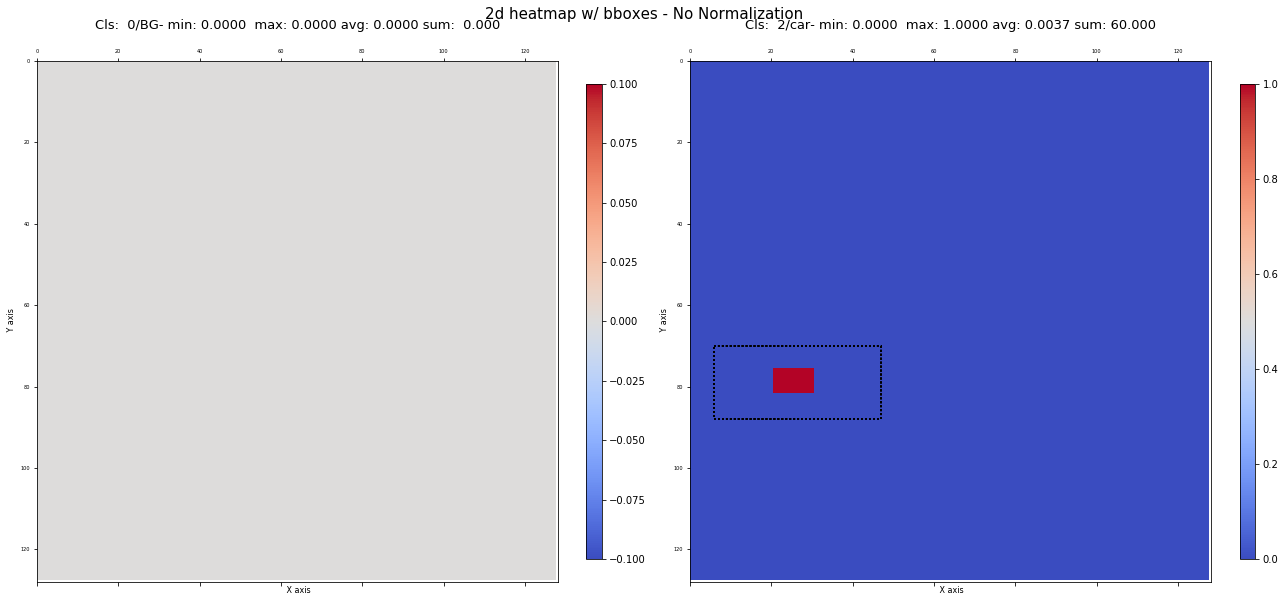

 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (1, 128, 128, 7)  boxes:  (1, 7, 32, 23)
 Image Id:  0  Display classes: [0, 2]
 rows   1  columns : 2 boxes.shape :  (7, 32, 23)
 min_z_all shape: ()  min_z_all: 0.0  max_z_all: () max_z_all: 1.0
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == none 


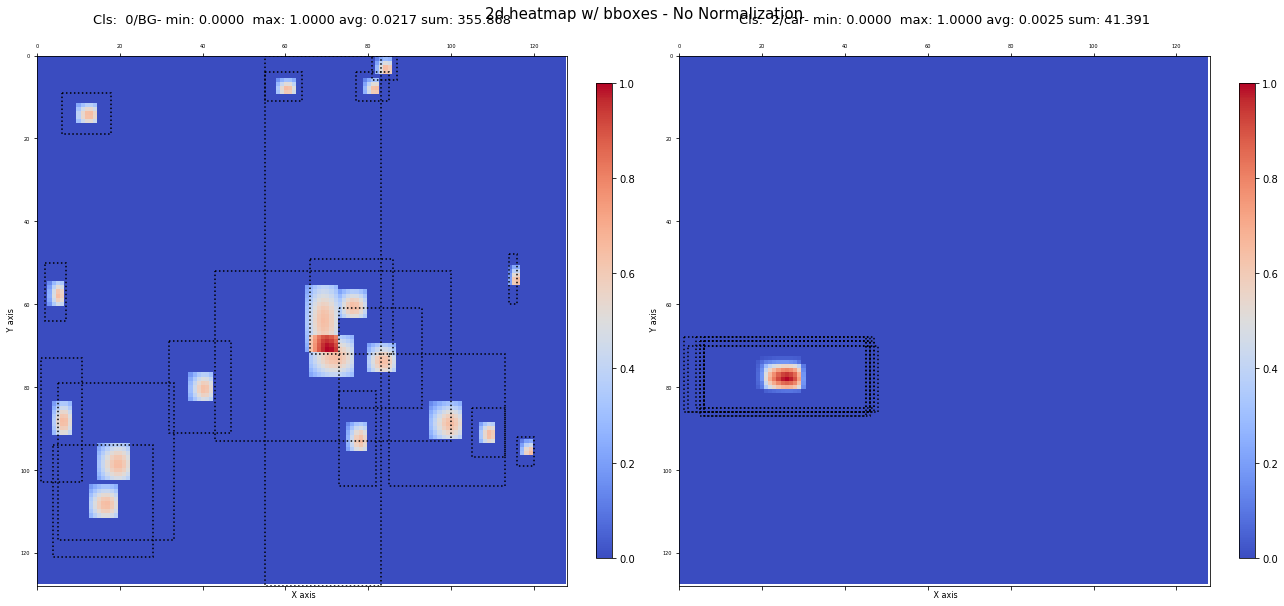

In [48]:
for img_id in [0]:     ##range(mrcnn_config.BATCH_SIZE):
    print(model_gt_hm.shape, model_gt_hm_scores.shape)
    gt_class_ids = np.unique(model_gt_hm_scores[img_id,:,:,4]).astype(int).tolist()
    pr_class_ids = np.unique(model_pr_hm_scores[img_id,:,:,4]).astype(int).tolist()    
    print('Image : {}  GT ClassIds: {}'.format(img_id, gt_class_ids))
    print('Image : {}  PR ClassIds: {}'.format(img_id, pr_class_ids))
#     plot_2d_heatmap_with_bboxes(model_gt_hm, model_gt_hm_scores, 
#                                 img_id, class_ids, class_names = class_names, size = (9,9), scale = 4)
    plot_2d_heatmap(model_gt_hm, model_gt_hm_scores, 
                                img_id, class_ids, class_names = class_names, size = (9,9), scale = 1)
    plot_2d_heatmap(model_pr_hm, model_pr_hm_scores, 
                                img_id, class_ids, class_names = class_names, size = (9,9), scale = 1)

####  2D plot of `model_fcn_heatmap` returned from model

(1, 128, 128, 7)
Image : 0  ClassIds: [0, 2]
 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (1, 128, 128, 7)  boxes:  (1, 7, 32, 23)
 Image Id:  0  Display classes: [0, 2]
 rows   1  columns : 2 boxes.shape :  (7, 32, 23)
 min_z_all shape: ()  min_z_all: -0.0026486753  max_z_all: () max_z_all: 0.003029962
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == none 


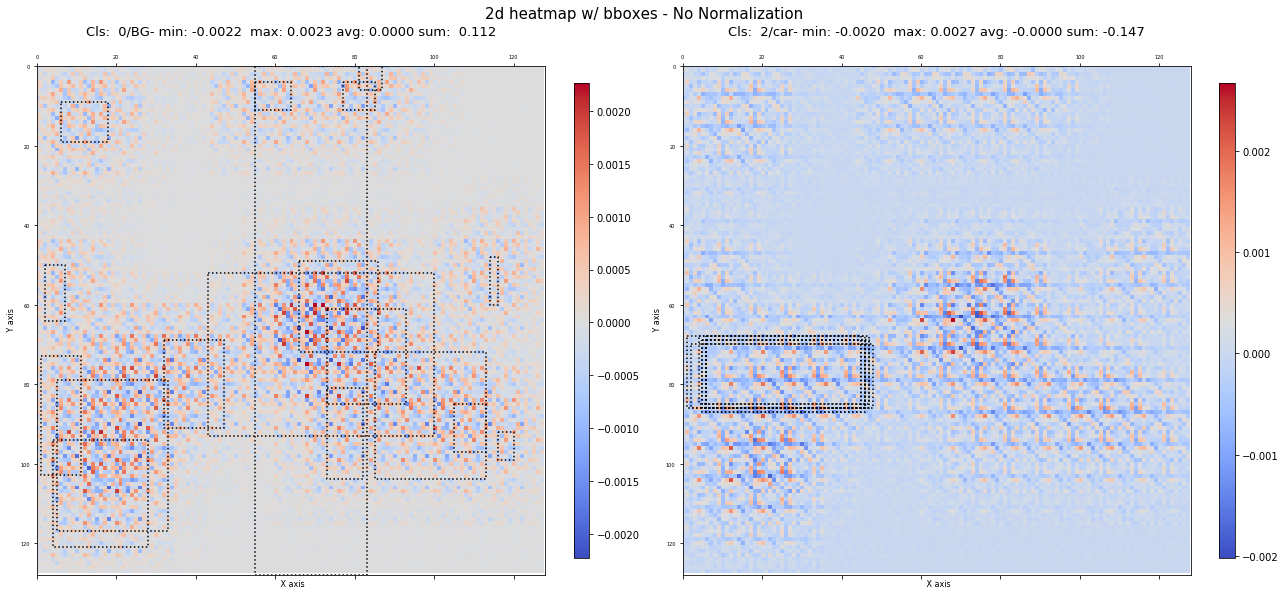

In [50]:
for img_id in [0]:     ##range(mrcnn_config.BATCH_SIZE):
    print(model_fcn_hm.shape)
    class_ids = np.unique(model_fcn_hm_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_2d_heatmap(model_fcn_hm, model_fcn_hm_scores, 
                                img_id, class_ids,size=(9,9), class_names = class_names, scale = 1)

####  2D plot of `model_fcn_heatmap` returned from model - ALL CLASSES

In [ ]:
from mrcnn.visualize import plot_2d_heatmap_all_classes
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  Pred ClassIds: {}'.format(img_id, class_ids))
    print('            Gt   ClassIds: {}'.format(np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()))
#     plot_3d_heatmap(model_fcn_heatmap, img_id, class_ids,class_names = class_names, size = (8,8), zlim=0)
#     plot_2d_heatmap_with_bboxes(model_fcn_heatmap[...,:class_ids[-1]+1], model_gt_heatmap_scores, img_id, 
#                                 class_ids, class_names = class_names, columns = 2, scale = 4)
    plot_2d_heatmap_all_classes(model_fcn_heatmap, model_gt_heatmap_scores, img_id,class_names = class_names, columns = 2, scale = 4)

####  2D plot of `pred_heatmap_norm` returned from MRCNN 

In [ ]:
for img_id in [0]: ## range(mrcnn_config.BATCH_SIZE):
    # print(pred_refined_heatmap_scores[img_id,:4])
    print(model_pred_heatmap_norm.shape)
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    
    plot_2d_heatmap_with_bboxes(model_pred_heatmap_norm, model_pred_heatmap_scores, 
                                img_id, class_ids, class_names = class_names, size = (9,9), scale = 4)
#     plot_2d_heatmap(pred_heatmap_norm, img_id, class_ids, width=6, height=6, class_names = class_names)


###  3D Plots

####  3D plot of  `gt_heatmap_norm` returned form code above

In [ ]:
for img_id in [0]: ## range(mrcnn_config.BATCH_SIZE):
    print(model_gt_heatmap.shape)
    class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap(model_gt_heatmap, img_id, class_ids, class_names = class_names, size=(7,7))


####  3D plot of `pred_heatmap_norm` returned form model

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(model_pred_heatmap_norm.shape)
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap(model_pred_heatmap_norm, img_id, class_ids, class_names = class_names, size=(8,8) )


####  3D plot of `fcn_heatmap` returned form model - only classes in pred_scores

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(model_fcn_heatmap.shape)
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap(model_fcn_heatmap, img_id, class_ids,class_names = class_names, size = (8,8), zlim=0)


####  3D plot of `fcn_heatmap` returned form model - all classes

In [ ]:
# for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
#     class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
#     print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
# #     plot_3d_heatmap(model_fcn_heatmap, img_id, class_ids,class_names = class_names, size = (8,8), zlim=0)
#     plot_3d_heatmap_all_classes(model_fcn_heatmap[...,:class_ids[-1]+1], img_id, class_names = class_names, size = (8,8), zlim=0.0)


####  3D comparative display `pred_heatmap` / `fcn_heatmap` 

In [ ]:
from mrcnn.visualize import plot_3d_heatmap_compare
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(model_pred_heatmap_norm.shape)
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap_compare(model_pred_heatmap_norm,model_fcn_heatmap, img_id, class_ids, class_names = class_names, size=(8,8), zlim = 0 )


####  3D comparative display `gt_heatmap` / `fcn_heatmap` 

In [ ]:
from mrcnn.visualize import plot_3d_heatmap_compare
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap_compare(model_gt_heatmap,model_fcn_heatmap, img_id, class_ids, class_names = class_names, size=(8,8), zlim = 0 )


####  2D comparative display `pred_heatmap` / `fcn_heatmap`  

In [ ]:
from mrcnn.visualize import plot_2d_heatmap_compare
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_2d_heatmap_compare(model_pred_heatmap_norm, model_fcn_heatmap, model_pred_heatmap_scores,
                            img_id, class_ids, class_names = class_names, size=(8,8), scale = 4 )

##  Misc code

###  Run TF session

In [ ]:
feed_dict = {input_tensor: pred_tensor}
# fetches = [nz_boxes, int_masks]
fetches = [bboxes, output, reshape_tensor, final_output]
sess = tf.Session()
print(' tfsession() is ', sess)
sess.run(tf.global_variables_initializer())
tt = sess.run(fetches, feed_dict = feed_dict )
print(type(tt), len(tt))
sess.close()

In [ ]:
feed_dict = {in_tensor: pred_tensor}
fetches = [stacked_tensor, rnd_tensor, gauss_sum]
sess = tf.Session()
print(' tfsession() is ', sess)
tt = sess.run(fetches, feed_dict = feed_dict )
print(type(tt), len(tt))
sess.close()